In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import os

## Training Model

#### Very useful graphs

https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/issues/27 

In [4]:
os.getcwd()

'/users/riya/gancode/pytorch-CycleGAN-and-pix2pix'

In [15]:
os.chdir('/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/')
os.getcwd()

'/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix'

In [ ]:
!python train.py --dataroot /users/riya/race/gandataset --name edges2shoes --model pix2pix --gpu_ids 0,1,2,3

In [10]:
!ls checkpoints/edges2shoes

100_net_D.pth  135_net_G.pth  175_net_D.pth  30_net_G.pth  70_net_D.pth
100_net_G.pth  140_net_D.pth  175_net_G.pth  35_net_D.pth  70_net_G.pth
105_net_D.pth  140_net_G.pth  180_net_D.pth  35_net_G.pth  75_net_D.pth
105_net_G.pth  145_net_D.pth  180_net_G.pth  40_net_D.pth  75_net_G.pth
10_net_D.pth   145_net_G.pth  185_net_D.pth  40_net_G.pth  80_net_D.pth
10_net_G.pth   150_net_D.pth  185_net_G.pth  45_net_D.pth  80_net_G.pth
110_net_D.pth  150_net_G.pth  190_net_D.pth  45_net_G.pth  85_net_D.pth
110_net_G.pth  155_net_D.pth  190_net_G.pth  50_net_D.pth  85_net_G.pth
115_net_D.pth  155_net_G.pth  195_net_D.pth  50_net_G.pth  90_net_D.pth
115_net_G.pth  15_net_D.pth   195_net_G.pth  55_net_D.pth  90_net_G.pth
120_net_D.pth  15_net_G.pth   200_net_D.pth  55_net_G.pth  95_net_D.pth
120_net_G.pth  160_net_D.pth  200_net_G.pth  5_net_D.pth   95_net_G.pth
125_net_D.pth  160_net_G.pth  20_net_D.pth   5_net_G.pth   latest_net_D.pth
125_net_G.pth  165_net_D.pth  20_net_G.pth   60_net_D.pth  l

## Learning Curves (csv made finally!!!!)

In [4]:
os.getcwd()

'/users/riya/race/gancode'

In [6]:
results_df = pd.read_csv("/users/riya/race/gancode/results_310.txt", header = 0)

In [7]:
results_df.head()

epoch   time  G_GAN    G_L1  D_real  D_fake
0      1  0.200  1.665  18.575   0.178   0.213
1      1  0.203  1.012  24.778   0.698   0.340
2      1  0.206  0.838  25.855   1.137   0.102
3      1  0.402  2.032  39.990   0.115   0.262
4      1  0.201  2.404  43.570   0.080   0.336

In [8]:
results_df.columns

Index(['epoch', 'time', 'G_GAN', 'G_L1', 'D_real', 'D_fake'], dtype='object')

In [9]:
len(results_df.columns), len(results_df)

(6, 3246)

<AxesSubplot:xlabel='epoch'>

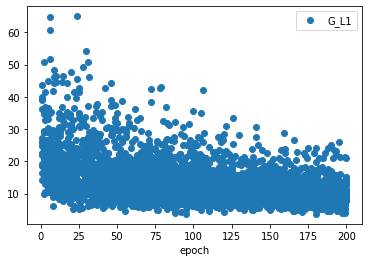

In [10]:
results_df.plot(x='epoch', y='G_L1', style='o')

In [11]:
average_results = results_df.groupby('epoch', as_index=False)[['G_GAN','G_L1','D_real','D_fake']].mean()

In [12]:
average_results.head(), len(average_results)

(   epoch     G_GAN       G_L1    D_real    D_fake
 0      1  2.064062  27.305500  0.347750  0.225000
 1      2  2.406187  24.028437  0.310500  0.291875
 2      3  2.459250  23.569250  0.146250  0.354562
 3      4  2.478000  21.380187  0.434375  0.170062
 4      5  2.546765  24.059000  0.369882  0.178000,
 200)

<AxesSubplot:xlabel='epoch'>

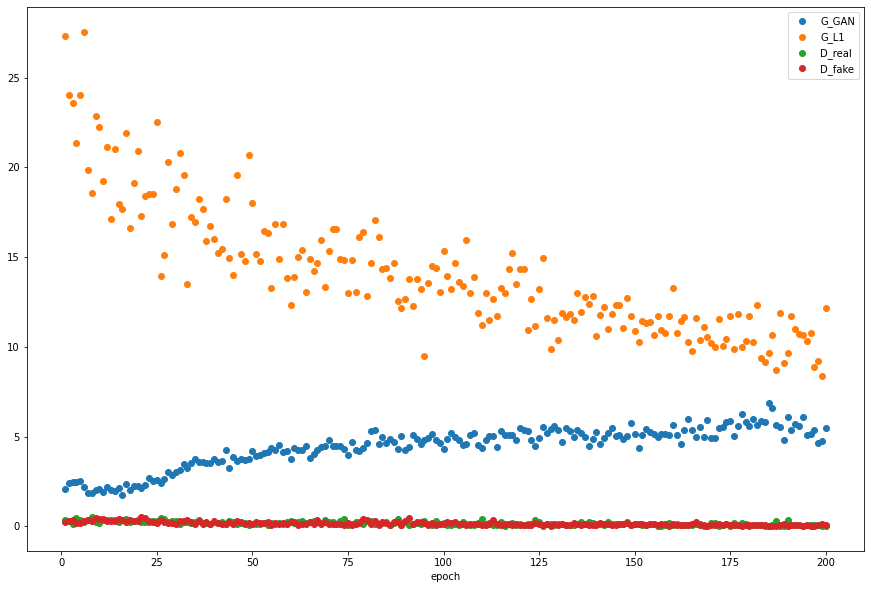

In [13]:
average_results.plot(x='epoch', y=['G_GAN','G_L1','D_real','D_fake'], figsize = (15,10), style='o')

<AxesSubplot:title={'center':'Loss vs. Epochs in Training Pix2Pix GAN with Batch Size = 1'}, xlabel='epoch', ylabel='loss'>

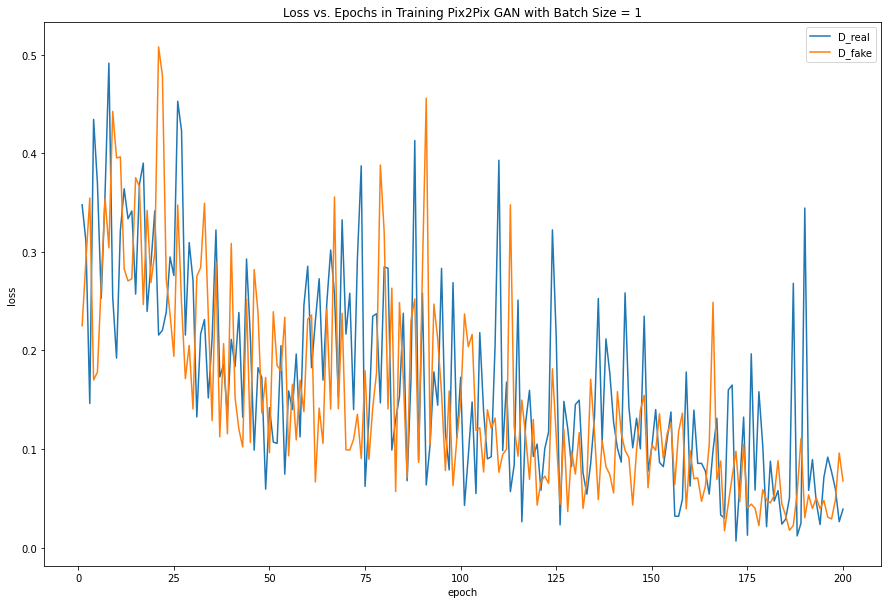

In [14]:
average_results.plot.line(x='epoch', y=['D_real','D_fake'], figsize = (15,10), title = 'Loss vs. Epochs in Training Pix2Pix GAN with Batch Size = 1', ylabel = 'loss', style = '')

## Results on Black Images

In [44]:
!python test.py --dataroot /users/riya/race/gandataset --name edges2shoes --model pix2pix --num_test 86

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/gandataset        	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

In [45]:
len(os.listdir('/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/results/edges2shoes/test_latest/images/'))

258

In [47]:
258/3 # yay

86.0

### Black Testing Results Graphic

In [12]:
results_path = "/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/results/edges2shoes/test_latest/images/"

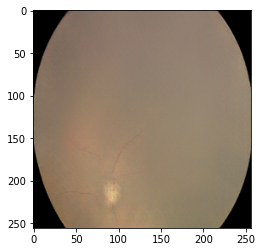

In [13]:
img = mpimg.imread(results_path + "40804_fake_B.png")
imgplot = plt.imshow(img, cmap='gray')
plt.show()

#### The model's resizing stretched the image. Is this a problem? I Hope not.

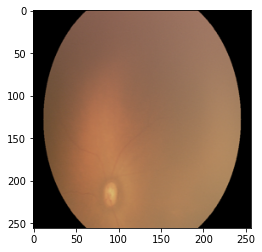

In [14]:
img2 = mpimg.imread(results_path + "40804_real_B.png")
imgplot2 = plt.imshow(img2, cmap='gray')
plt.show()

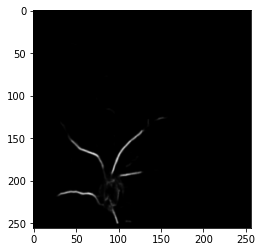

In [15]:
img3 = mpimg.imread(results_path + "40804_real_A.png")
imgplot3 = plt.imshow(img3, cmap='gray')
plt.show()

In [52]:
img3.shape

(256, 256, 3)

In [25]:
test_ids = ['37047','18789','30051','33961','96646','92768','96994','91954','93148','98264','25832','47250','39567',
            '40804','93149','98322','33981','30031','39561','39206','9477','39578','101696','101740','45347','37988',
            '31328','101734','49226','17400','62416','96989','92747','54055','80935','75671','74717','91920','34742',
            '96245','26900','105657','45035','96857','31331','34454','31003','101729','30029','87363','105655','75661',
            '33987','88758','91947','96998','89094','79675','105679','89116','96852','91956','101916','31333','50963',
            '74909','55217','96154','75676','101732','77119','74722','91924','76794','17362','92760','77101','49227',
            '50974','45343','103117','45055','101921','49217','91936','105673']

In [26]:
len(test_ids)

86

In [27]:
def generate_output_images(arr_ids, path):
    for i in arr_ids:
        seg_img = mpimg.imread(path + i + "_real_A" + ".png")
        fund_real_img = mpimg.imread(path + i + "_real_B" + ".png")
        fund_fake_image = mpimg.imread(path + i + "_fake_B" + ".png")
        
        # generate 3 x 1 plot
        f, axarr = plt.subplots(1,3)
        axarr[0].imshow(seg_img)
        axarr[1].imshow(fund_real_img)
        axarr[2].imshow(fund_fake_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


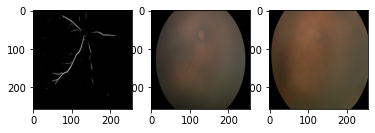

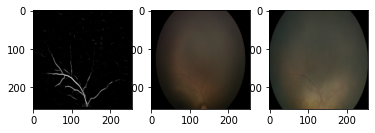

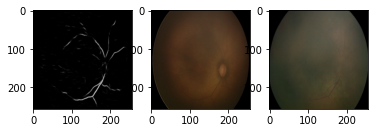

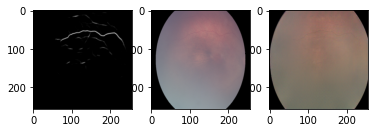

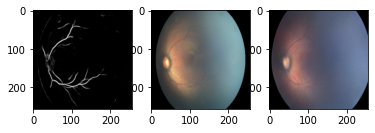

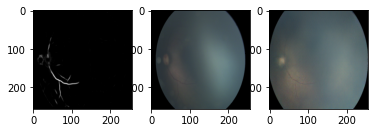

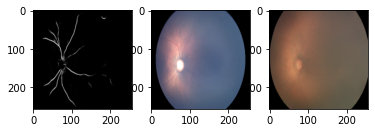

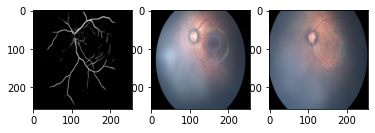

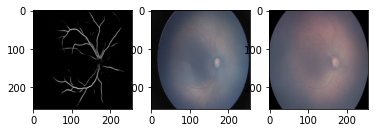

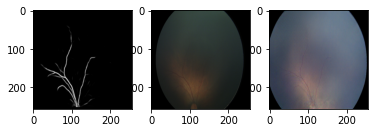

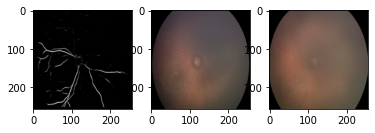

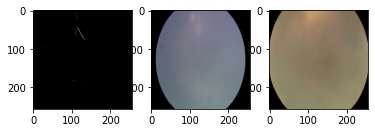

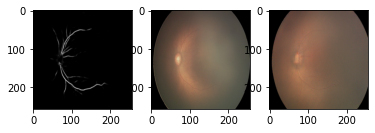

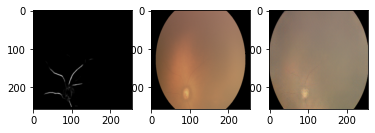

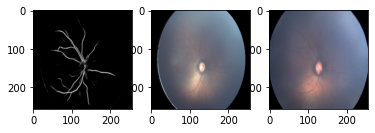

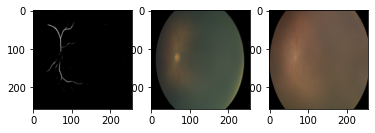

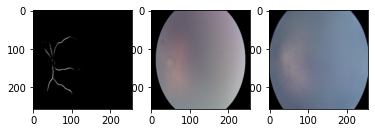

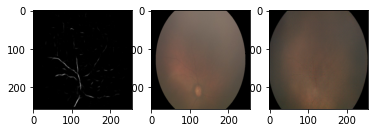

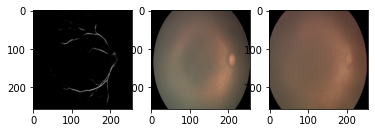

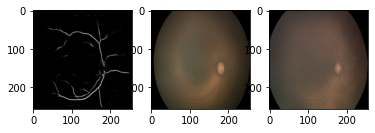

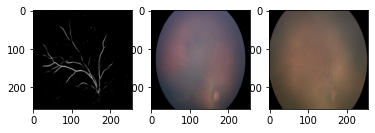

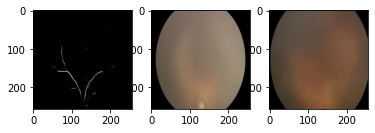

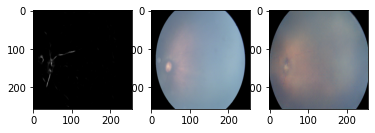

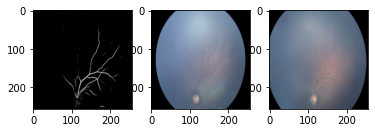

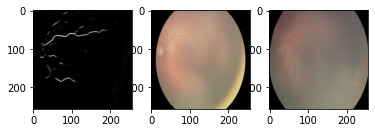

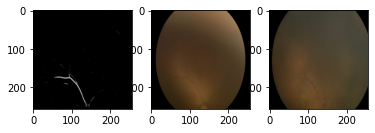

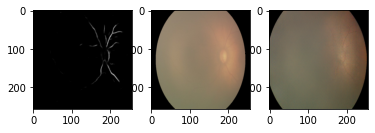

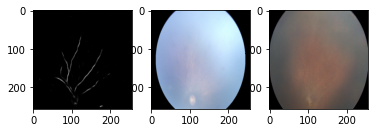

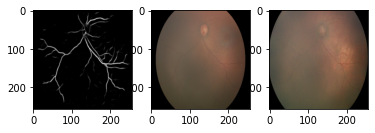

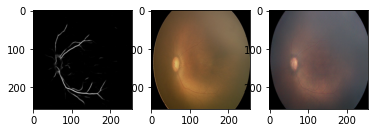

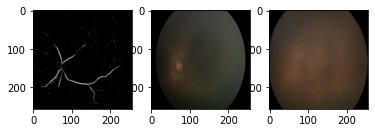

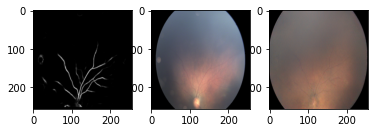

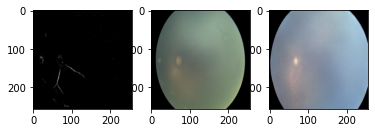

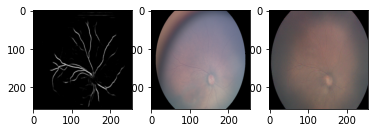

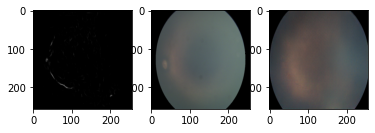

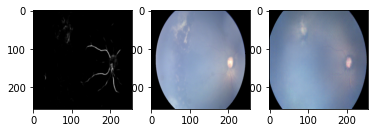

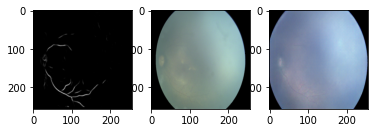

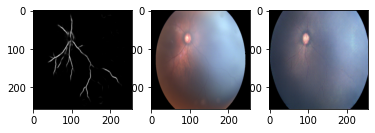

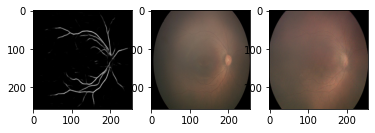

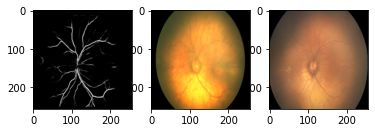

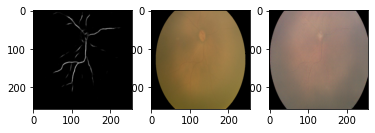

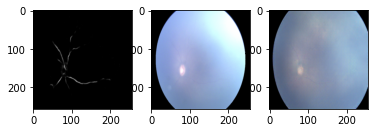

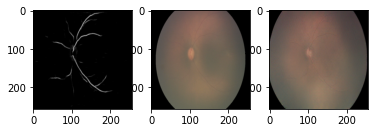

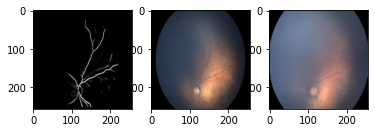

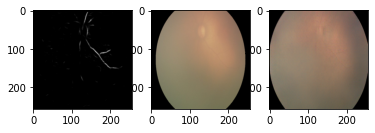

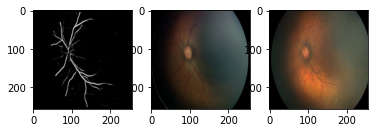

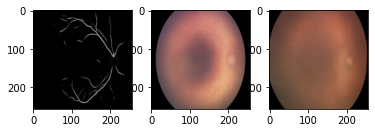

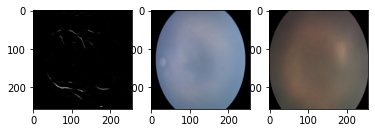

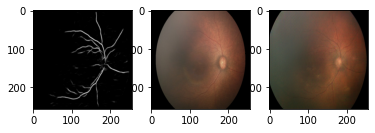

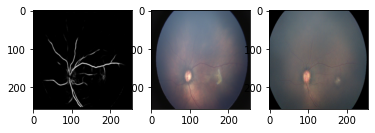

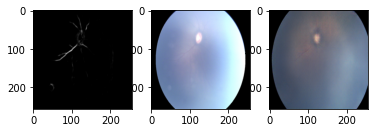

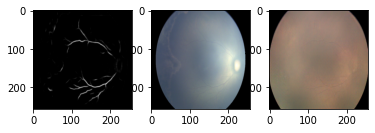

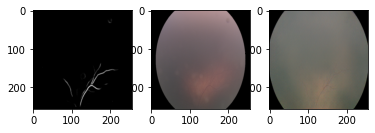

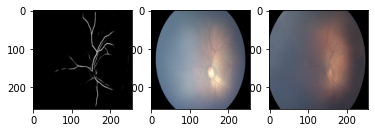

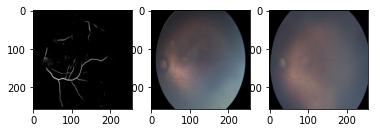

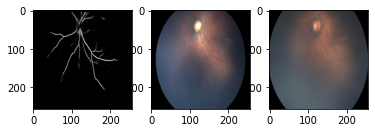

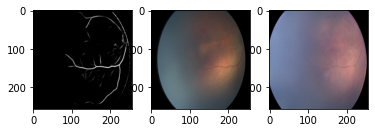

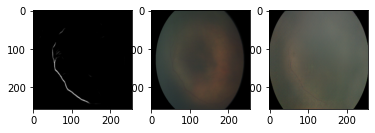

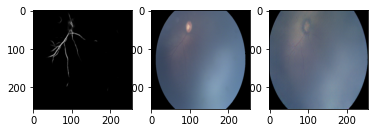

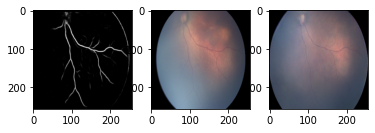

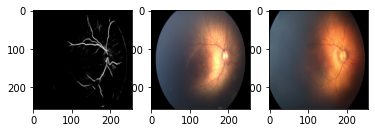

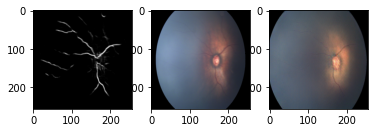

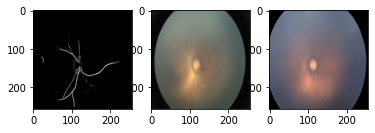

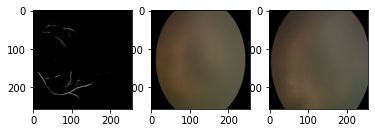

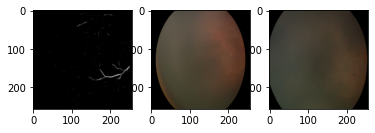

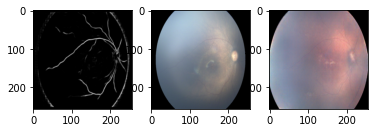

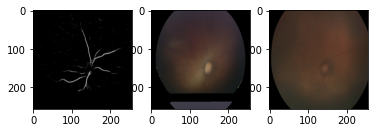

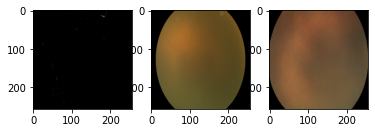

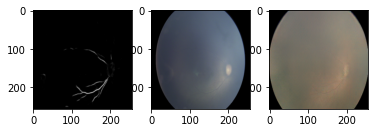

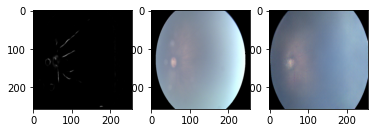

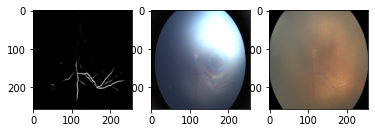

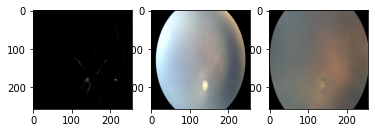

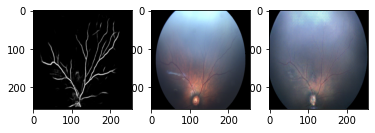

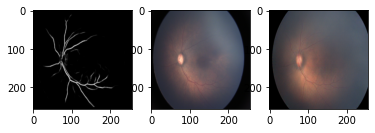

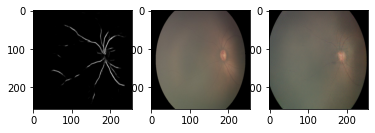

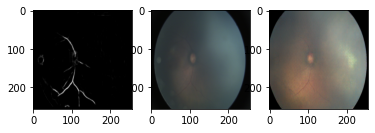

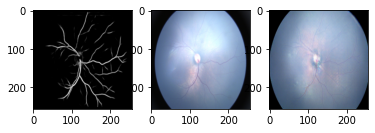

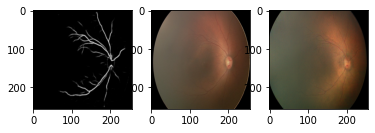

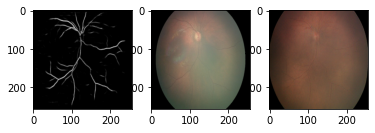

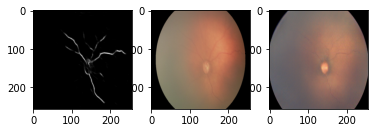

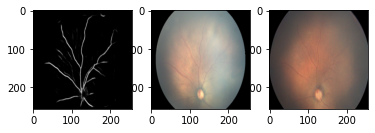

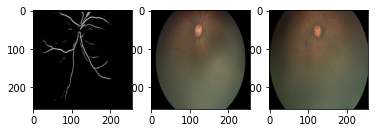

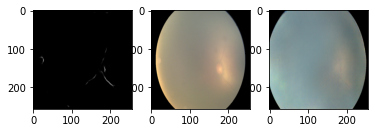

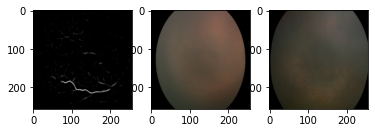

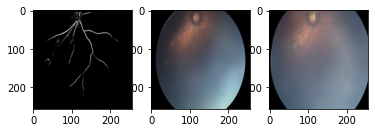

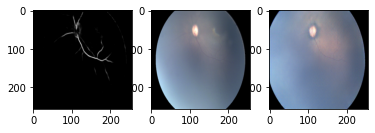

In [56]:
generate_output_images(test_ids, results_path)

Hyperparameter tuning? This is upon no hyperparameter tuning? Also, how to get accuracy from this. We can just compare side by side but who knows. Also, should I downsize the segmentation images, or upsize these images so that we can compare white segmentation to white-fake-black-segmentations?

## Results on White Images

Placed into right folder in preprocessing document :)

In [17]:
os.getcwd()

'/users/riya/gancode/pytorch-CycleGAN-and-pix2pix/results/edges2shoes/test_latest'

In [18]:
os.chdir('/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix')

In [19]:
os.getcwd()

'/users/riya/gancode/pytorch-CycleGAN-and-pix2pix'

In [11]:
!python test.py --dataroot /users/riya/race/gandataset/test_white --name edges2shoes --model pix2pix --num_test 25

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /users/riya/gandataset/test_white	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

In [21]:
len(os.listdir('/users/riya/race/gancode/pytorch-CycleGAN-and-pix2pix/results/edges2shoes/test_latest/images'))

333

In [22]:
333/3

111.0

In [23]:
86 + 25 

111

#### Ok so actually combined all images and stored them all in results_path (/results/edges2shoes/test_latest). And conveniently, we know all numbers are different, so i guess this will work out fine for us! no issues then :)

In [32]:
os.listdir(results_path)

['17362_real_B.png',
 '101732_fake_B.png',
 '45055_real_A.png',
 '74682_fake_B.png',
 '30792_real_B.png',
 '55217_real_B.png',
 '80935_fake_B.png',
 '26900_real_B.png',
 '37988_real_B.png',
 '31331_real_A.png',
 '77014_fake_B.png',
 '76794_real_A.png',
 '30031_real_B.png',
 '79675_real_A.png',
 '92768_real_B.png',
 '74717_fake_B.png',
 '39578_fake_B.png',
 '103117_fake_B.png',
 '16788_real_A.png',
 '45035_fake_B.png',
 '96989_fake_B.png',
 '81848_real_B.png',
 '17400_real_B.png',
 '62416_real_B.png',
 '96994_fake_B.png',
 '74722_real_B.png',
 '54055_real_A.png',
 '91954_real_B.png',
 '93149_real_B.png',
 '47250_real_A.png',
 '79741_fake_B.png',
 '47077_real_A.png',
 '75676_real_A.png',
 '84994_real_B.png',
 '101696_fake_B.png',
 '39561_real_B.png',
 '59419_real_A.png',
 '37047_real_B.png',
 '45343_real_A.png',
 '75661_real_B.png',
 '51485_real_A.png',
 '85641_real_A.png',
 '40804_real_A.png',
 '96154_real_B.png',
 '84965_real_A.png',
 '93148_real_A.png',
 '79737_real_A.png',
 '18172_re

In [29]:
white_test_ids = ['96618','56548','99901','84606','18172','24576','59419','74682','30792','51485','79737','77014','24577',
                  '16788','84965','103039','79741','84994','52444','103078','79473','18171','81848','85641','47077']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


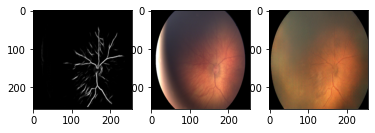

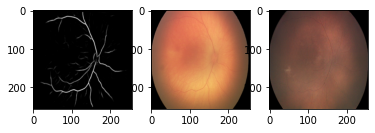

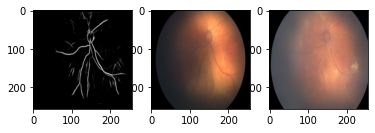

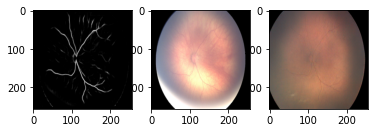

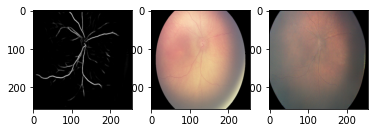

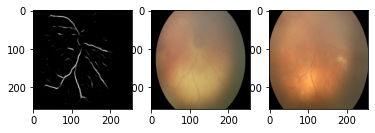

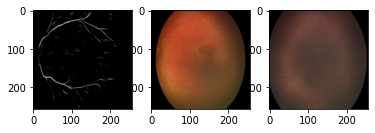

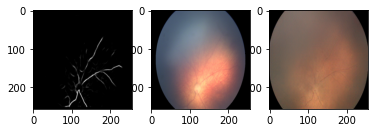

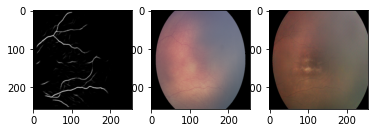

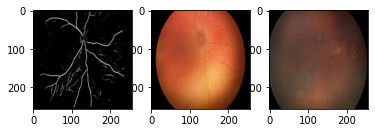

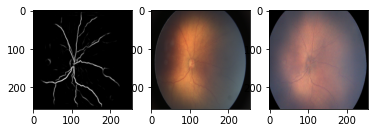

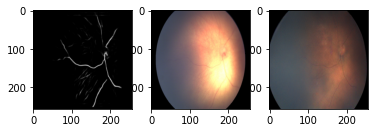

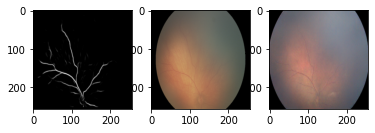

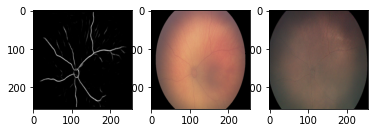

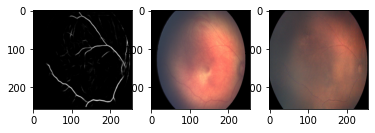

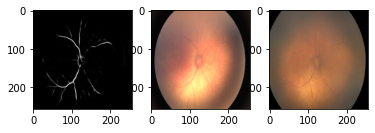

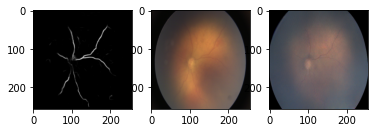

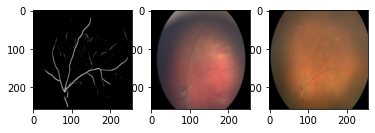

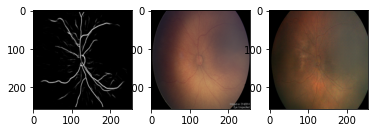

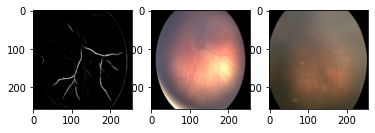

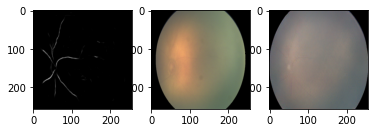

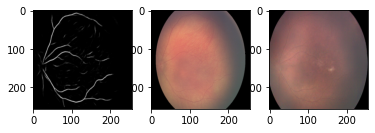

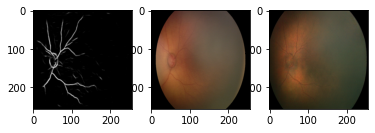

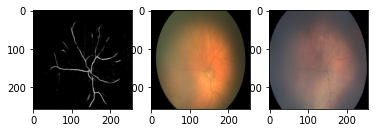

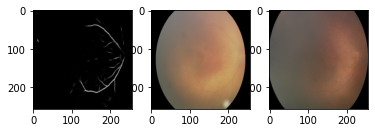

In [31]:
generate_output_images(white_test_ids, results_path)